<h1 style="text-align: center;">Fast Fourier Transform</h1>
<p style="text-align: center;">Lab 9</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with fast Fourier transforms using Python.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Plots for **Task 1**.  
[ ] Plots for **Task 2**.  
[ ] Plots for **Task 3**.  
[ ] Plots for **Task 4**.  
[ ] Plots for **Task 5**.  
*Note: There needs to be 7 figures each with 5 subplots for this lab to be correct.*  

### 3. Part 1
##### 3.0.1 Example Code
Use the following example code to define a function that will properly execute a fast fourier transform. The inputs to the function should be the signal, $x$, and the sampling frequency, $f_s$. Do **ALL** plotting outside of the function using **matplotlib.pyplot.stem()** for the stem style plots and **matplotlib.pyplot.plot()** for the signal plots. *Note: This code is not complete, it is just showing the necessary calculations. You will need to add code to make the function work correctly.*

In [59]:
# N = len(x) #find the length of the signal
# X_ftt = scipy.fftpack.fft(x) #perform the fft
# X_fft_shifted = scipy.fftpack.fftshift(X_fft) #shift zero frequency components to the center of the spectrum
# freq = np.arange(-N/2, N/2) * fs / N #compute the frequencies for the output signal. fs is the sampling frequency
# X_mag = np.abs(X_fft_shifted) / N #compute the magnitudes of the signal
# X_phi = np.angle(X_fft_shifted) #compute the phase of the signal

# # --- End user defined function --- #

# plt.stem(freq, X_mag)
# plt.stem(freq, X_phi)

##### 3.1 Tasks   
1. Plot $cos(2\pi t)$ from $0\le t \le2$s. In the same figure (separate subplot), plot the magnitude of the Fourier transform of this same signal, setting the sampling frequency $f_s=100$. Additionally, plot the phase of the Fourier transform. Plot for both the magnitude and phase, a limited view of the x-axis (frequency) to clearly show relevant values. *Note: For this task, you will need to use separate x-axis labels because one subplot is in the time domain and the other two are in the frequency domain. The resulting phase plot should be rather noisy in this task.*

In [60]:
import scipy.fftpack
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def my_fft(x, fs):
    N = len(x)
    X_fft = scipy.fftpack.fft(x)
    X_fft_shifted = scipy.fftpack.fftshift(X_fft)
    freq = np.arange(-N/2, N/2) * fs / N
    X_mag = np.abs(X_fft_shifted) / N
    X_phi = np.angle(X_fft_shifted)
    return freq, X_mag, X_phi

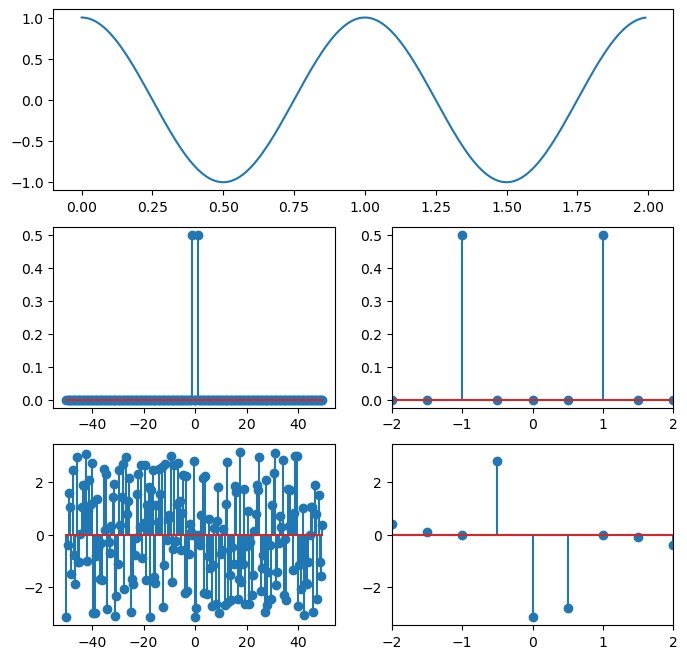

In [62]:
x = np.cos(2*np.pi*t)
fs = 100
steps = 1/fs
t = np.arange(0, 2, steps)
freq, X_mag, X_phi = my_fft(x, fs)
freqmin, freqmax = -2, 2

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,x)

plt.subplot(3,2,3)
plt.stem(freq,X_mag)

plt.subplot(3,2,4)
plt.stem(freq,X_mag)
plt.xlim([freqmin, freqmax])

plt.subplot(3,2,5)
plt.stem(freq,X_phi)

plt.subplot(3,2,6)
plt.stem(freq,X_phi)
plt.xlim([freqmin, freqmax])
plt.show()

2. Repeat **Task 1** for the signal $5sin(2\pi t)$.

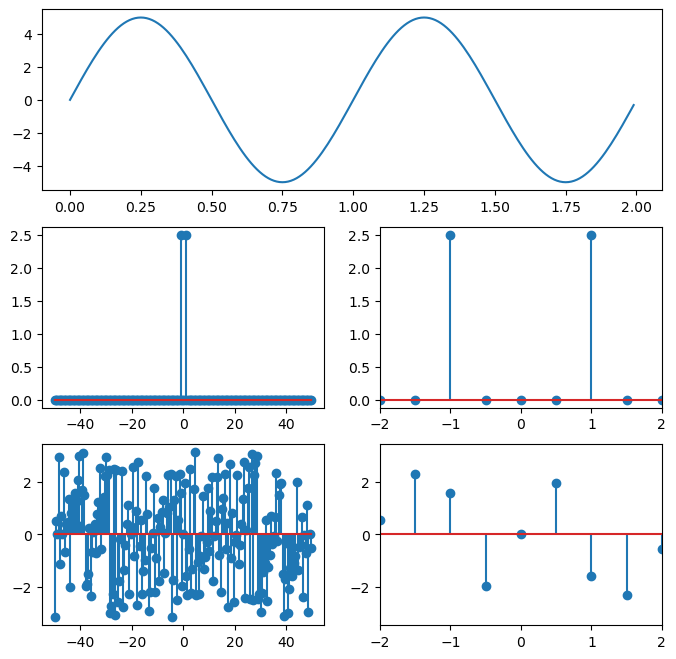

In [63]:
x = 5*np.sin(2*np.pi*t)
freq, X_mag, X_phi = my_fft(x, fs)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,x)

plt.subplot(3,2,3)
plt.stem(freq,X_mag)

plt.subplot(3,2,4)
plt.stem(freq,X_mag)
plt.xlim([freqmin, freqmax])

plt.subplot(3,2,5)
plt.stem(freq,X_phi)

plt.subplot(3,2,6)
plt.stem(freq,X_phi)
plt.xlim([freqmin, freqmax])
plt.show()

3. Repeat **Task 1** for the signal $2cos((2 \pi \cdot2t) - 2) + sin^2((2 \pi \cdot 6t) + 3)$.

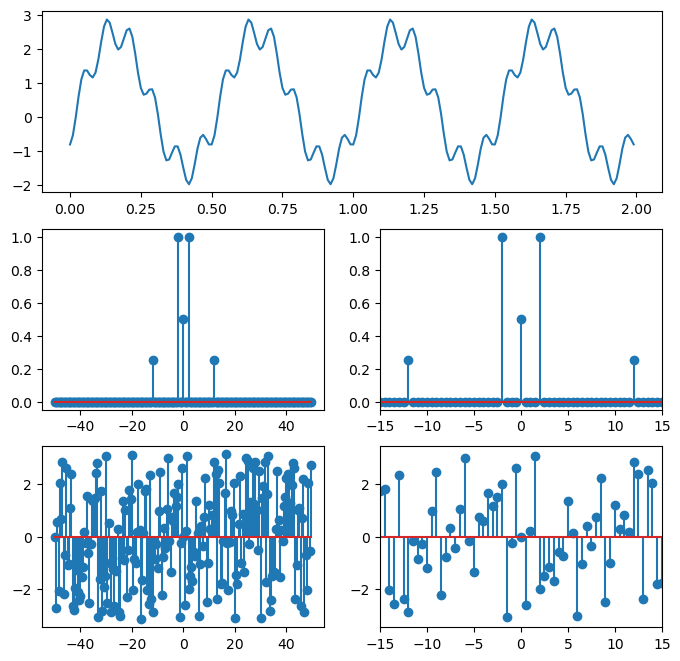

In [64]:
x = 2*np.cos((2*np.pi*2*t)-2)+np.sin((2*np.pi*6*t)+3)**2
freq, X_mag, X_phi = my_fft(x, fs)
freqmin, freqmax = -15, 15

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,x)

plt.subplot(3,2,3)
plt.stem(freq,X_mag)

plt.subplot(3,2,4)
plt.stem(freq,X_mag)
plt.xlim([freqmin, freqmax])

plt.subplot(3,2,5)
plt.stem(freq,X_phi)

plt.subplot(3,2,6)
plt.stem(freq,X_phi)
plt.xlim([freqmin, freqmax])
plt.show()

4. In **Task 1**, **Task 2**, and **Task 3**, the plots of the phase should be unreadable. Resolve this by editing your FFT function so, for all elements of **X\_mag < 1e-10**, set the corresponding element of **X\_phi = 0**. Then, re-run the code for each figure in **Task 1**, **Task 2**, and **Task 3**}.

In [65]:
def my_fft_new(x, fs):
    N = len(x)
    X_fft = scipy.fftpack.fft(x)
    X_fft_shifted = scipy.fftpack.fftshift(X_fft)
    freq = np.arange(-N/2, N/2) * fs / N
    X_mag = np.abs(X_fft_shifted) / N
    X_phi = np.angle(X_fft_shifted)
    for i in np.arange(len(X_mag)):
        if X_mag[i] < 1e-10:
            X_phi[i] = 0
    return freq, X_mag, X_phi

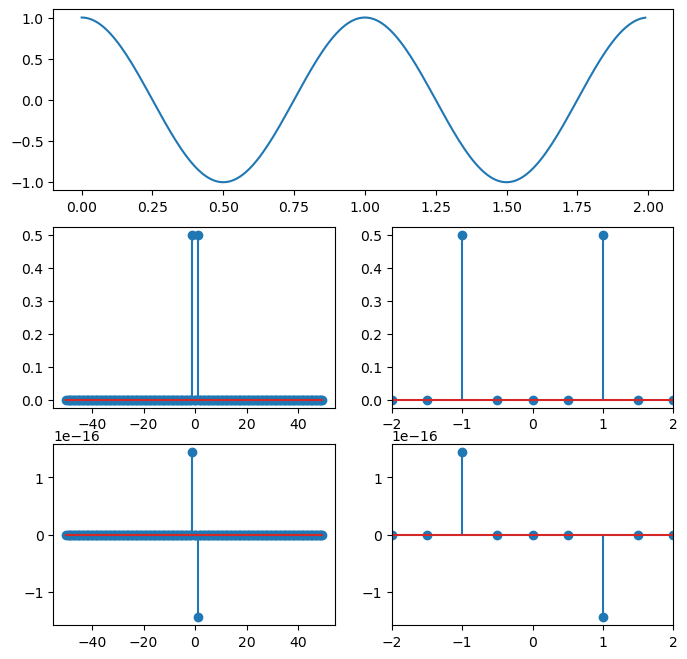

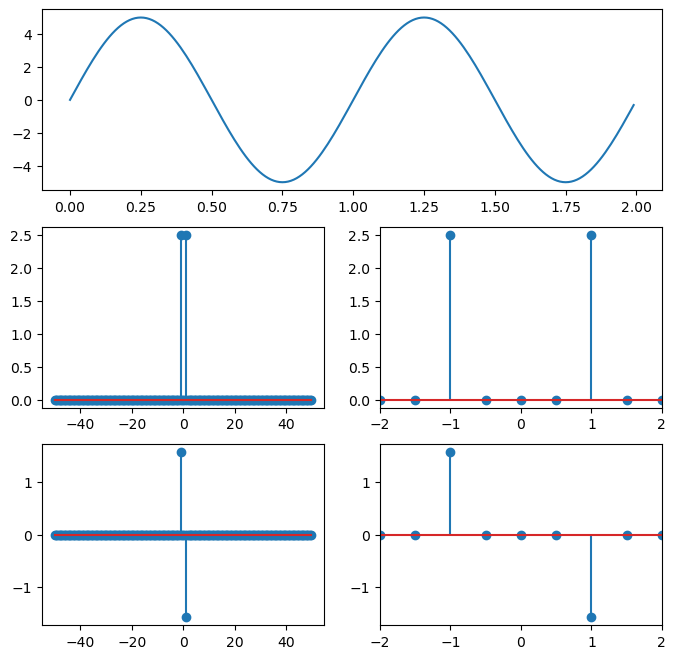

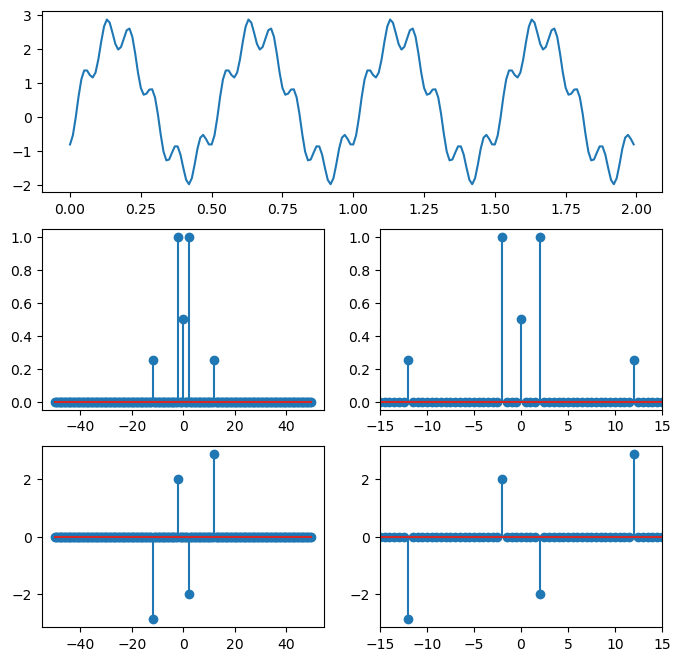

In [66]:
x = np.cos(2*np.pi*t)
fs = 100
steps = 1/fs
t = np.arange(0, 2, steps)
freq, X_mag, X_phi = my_fft_new(x, fs)
freqmin, freqmax = -2, 2

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,x)

plt.subplot(3,2,3)
plt.stem(freq,X_mag)

plt.subplot(3,2,4)
plt.stem(freq,X_mag)
plt.xlim([freqmin, freqmax])

plt.subplot(3,2,5)
plt.stem(freq,X_phi)

plt.subplot(3,2,6)
plt.stem(freq,X_phi)
plt.xlim([freqmin, freqmax])
plt.show()

x = 5*np.sin(2*np.pi*t)
freq, X_mag, X_phi = my_fft_new(x, fs)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,x)

plt.subplot(3,2,3)
plt.stem(freq,X_mag)

plt.subplot(3,2,4)
plt.stem(freq,X_mag)
plt.xlim([freqmin, freqmax])

plt.subplot(3,2,5)
plt.stem(freq,X_phi)

plt.subplot(3,2,6)
plt.stem(freq,X_phi)
plt.xlim([freqmin, freqmax])
plt.show()

x = 2*np.cos((2*np.pi*2*t)-2)+np.sin((2*np.pi*6*t)+3)**2
freq, X_mag, X_phi = my_fft_new(x, fs)
freqmin, freqmax = -15, 15

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,x)

plt.subplot(3,2,3)
plt.stem(freq,X_mag)

plt.subplot(3,2,4)
plt.stem(freq,X_mag)
plt.xlim([freqmin, freqmax])

plt.subplot(3,2,5)
plt.stem(freq,X_phi)

plt.subplot(3,2,6)
plt.stem(freq,X_phi)
plt.xlim([freqmin, freqmax])
plt.show()

5. Run for the Fourier series approximation of the square wave plotted in **Lab 8**, using only the $N = 15$ case through your updated version of the fft developed in **Task 4**. For the time-domain plot, use $0 \le t \le 16$s. Further, use $T = 8$ for the period of the series as you did in **Lab 8**.

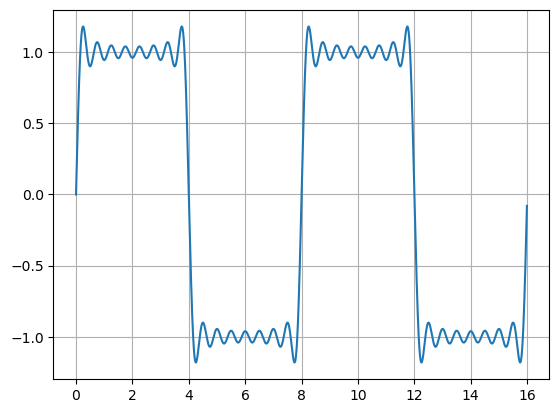

In [67]:
y = 0
t = np.arange(0, 16, steps)

for k in np.arange(1, 16):
            b = (4/(k*np.pi))*((1-np.cos(k*np.pi))/2)
            x = b*np.sin(k*(2*np.pi/8)*t)
            y += x

plt.figure()
plt.plot(t,y)
plt.grid()
plt.show()

### 4. Questions
1. What happens if the sampling frequency is lowered by an order magnitude? What happens if it is raised an order of magnitude?   
>The lower the sampling frequency, the lower the resolution of x(t) is. The higher the sampling frequency, the higher the resolution of x(t) is.
2. What difference does eliminating the small phase magnitudes make?
>Eliminating the small phase magnitudes helps filter out any noise in the system.
3. Verify your results from **Tasks 1** and **Task 2** using the Fourier transforms of cosine and sine. Explain why your results are correct. You will need the transforms in terms of Hz, not rad/s. For example, the Fourier transform of cosine (in Hz) is: 
$$\mathcal{F}\left\{cos \left(2 \pi f_0 t \right) \right\} = \frac{1}{2} \left[\delta \left(f - f_0 \right) + \delta \left(f + f_0 \right) \right]$$
>My results are correct since they are impulse functions equally away from zero and have the same magnitude. This complies with what the fourier transforms of sine and cosine are.
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>This lab was clear and fine to follow.